In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import regionmask
import matplotlib.pyplot as plt
import netCDF4
%matplotlib inline
import os

ModuleNotFoundError: No module named 'geopandas'

In [52]:
shapefile = 'E:\AGES_Projects\Dr.zakir_data\hingol_shape.shp'
basin = gpd.read_file(shapefile)
basin

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,S_Hingol,0,None,None,None,relativeToGround,-1,1,-1,None,None,"POLYGON Z ((66.11414 26.02663 0.00000, 66.1069..."
1,NW_Hingol,0,None,None,None,relativeToGround,-1,1,-1,None,None,"POLYGON Z ((65.76694 27.09002 0.00000, 65.7532..."
2,N_Hingol,0,None,None,None,relativeToGround,-1,1,-1,None,None,"POLYGON Z ((65.92957 27.83271 0.00000, 65.9394..."


<AxesSubplot:>

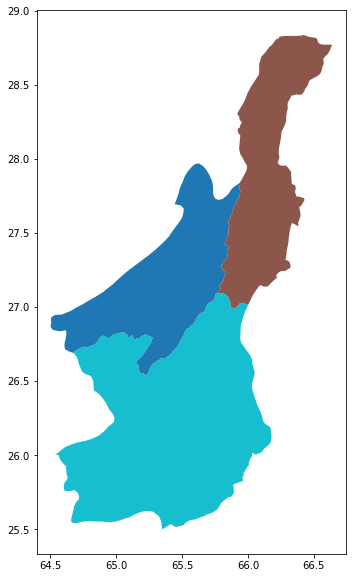

In [53]:
fig, ax =plt.subplots(figsize= (8,10))
basin.plot(ax=ax, column = 'Name')

In [5]:
my_list = list(basin['Name'])
my_list_unique = set(list(basin['Name']))
index = [my_list.index(x) for x in my_list_unique]

In [18]:
basin_mask_poly = regionmask.Regions(name = 'Name', numbers = index, outlines = {basin.geometry})
basin_mask_poly

TypeError: unhashable type: 'GeoSeries'

In [31]:
lon = np.arange(50, 70)
lat = np.arange(20, 29)

mask = regionmask.mask_geopandas(basin, lon, lat)
mask

<xarray.DataArray 'mask' (lat: 9, lon: 20)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  0.,  0., nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan,  2., nan, nan, nan]])
Coordinates:
  * lat      (lat) int32 20 21 22 23 24 25 26 27 28
  * lon      (lon) int32 50 51 52 53 54 55 56 57 58 ... 62 63 64 65 66 67 68 69

In [21]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines(color="0.1");

NameError: name 'ccrs' is not defined

In [54]:
poly_S_hingol = basin.geometry[0]
poly_NW_hingol = basin.geometry[1]
poly_N_hingol = basin.geometry[2]

In [61]:
regions_poly = regionmask.Regions([poly_S_hingol, poly_NW_hingol, poly_N_hingol])

regions_poly

<regionmask.Regions>
Name:     unnamed
overlap:  False

Regions:
0 r0 Region0
1 r1 Region1
2 r2 Region2

[3 regions]

In [59]:
ds = xr.open_dataset(r'E:\AGES_Projects\Dr.zakir_data\ERA5L_cdpr_8120_10km.nc')
ds

<xarray.Dataset>
Dimensions:    (lon: 126, lat: 108, time: 14335, bnds: 2)
Coordinates:
  * lon        (lon) float64 60.54 60.62 60.71 60.79 ... 70.71 70.79 70.87 70.96
  * lat        (lat) float64 32.46 32.38 32.29 32.21 ... 23.79 23.71 23.63 23.54
  * time       (time) datetime64[ns] 1981-01-01T11:30:00 ... 2020-03-31T11:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tp         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Jul 30 17:45:58 2020: cdo mergetime ERA5L_cdpr_8120_10k...
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...

In [62]:
mask = regions_poly.mask(ds.isel(time = 0), lat_name = 'lat', lon_name = 'lon')
mask

<xarray.DataArray 'mask' (lat: 108, lon: 126)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 32.46 32.38 32.29 32.21 ... 23.79 23.71 23.63 23.54
    time     datetime64[ns] 1981-01-01T11:30:00
  * lon      (lon) float64 60.54 60.62 60.71 60.79 ... 70.71 70.79 70.87 70.96

In [63]:
mask.to_netcdf(r'E:\AGES_Projects\Dr.zakir_data\mask.nc')

PermissionError: [Errno 13] Permission denied: b'E:\\AGES_Projects\\Dr.zakir_data\\mask.nc'

In [64]:
mask = xr.open_dataset(r'E:\AGES_Projects\Dr.zakir_data\mask.nc')
mask

<xarray.Dataset>
Dimensions:  (lat: 108, lon: 126)
Coordinates:
  * lat      (lat) float64 32.46 32.38 32.29 32.21 ... 23.79 23.71 23.63 23.54
    time     datetime64[ns] ...
  * lon      (lon) float64 60.54 60.62 60.71 60.79 ... 70.71 70.79 70.87 70.96
Data variables:
    mask     (lat, lon) float64 ...

In [66]:
mask_shape = ds.tp.where(mask ==0)
mask_shape.to_netcdf(r'E:\AGES_Projects\Dr.zakir_data\southern_hingol.nc')

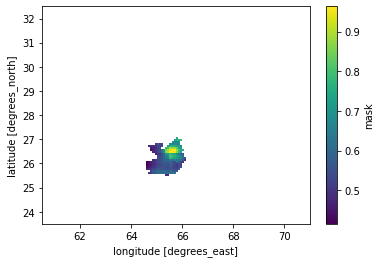

In [32]:
mask_shape.mask.mean(dim ='time').plot()
#basin.plot(ax =ax, apha =0.8, facecolor ='none')

In [47]:
df = pd.DataFrame(dict(pcp = mask_shape.mask.mean(dim=('lat','lon')), time = mask_shape.time))
df.to_excel(r'E:\AGES_Projects\Dr.zakir_data\daily_pcp.xlsx')

In [50]:
rain = df.set_index('time').resample('M').pcp.sum()
rain.to_excel(r'E:\AGES_Projects\Dr.zakir_data\monthly_pcp.xlsx')

# Extracting Values from Point

In [67]:
station = pd.read_csv(r'E:\AGES_Projects\Dr.zakir_data\pcp\pcp.csv')
station

,ID,NAME,LAT,LONG,ELEVATION
0,1,PStn1,26.59,64.79,1058
1,2,PStn2,26.09,64.79,821
2,3,PStn3,25.84,64.79,317
3,4,PStn4,25.59,64.79,273
4,5,PStn5,26.59,65.04,881
5,6,PStn6,26.34,65.04,536
6,7,PStn7,26.09,65.04,627
7,8,PStn8,25.84,65.04,268
8,9,PStn9,25.59,65.04,263
9,10,PStn10,26.59,65.29,646


In [76]:
obs = []
for index,row in station.iterrows():
    st_name  = row['NAME']
    lon=float(row['LONG'])
    lat=float(row['LAT'])
    o = mask_shape.mask.sel(lon = lon, lat = lat, method = 'nearest').to_numpy()
    obs.append(o)
    

In [81]:
file = pd.DataFrame(np.transpose(obs))

In [86]:
file = file.drop(columns = [1,9])

KeyError: '[1, 9] not found in axis'

In [94]:
col = [x for x in file.columns]

In [102]:
col

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [106]:
for station in col:   ## Here insert the range of totalstations
    station_name = 'PStn'+str(station+1)
    if station ==0:
        pcp = pd.DataFrame(file[station])
    else:
        pcp = pd.DataFrame(file[station])
    
    ## Below provide directory or path of folder where you need to save file, leave the rest as it is.
    pcp.to_csv(r'E:\AGES_Projects\Dr.zakir_data\pcp'+'\\'+station_name+'.txt', index = None, header = None)

In [109]:
for files in os.listdir(r'E:\AGES_Projects\Dr.zakir_data\pcp'): #<------provide the directory of folder where file exist
    if files[-4:]=='.txt':
        
        with open(r"E:\AGES_Projects\Dr.zakir_data\pcp"+'\\'+files,"r+") as t: # <---also there too
            a=t.read()
        with open(r"E:\AGES_Projects\Dr.zakir_data\pcp"+'\\'+files,"w+") as t: # <---also there too
            t.write("19810101\n" + a) # <-------Here change the date